In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install gensim pyLDAvis

In [ ]:
import zipfile

zip_path = "/content/drive/MyDrive/NLP/assigment6/articles1.csv.zip"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/")


In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

# **Load and Clean Data**

In [ ]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

df = pd.read_csv("/content/articles1.csv")
df = df.dropna(subset=["content"])

stop_words = set(stopwords.words("english"))


# Text Preprocessing
def preprocess(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [re.sub(r'\W+', '', word) for word in tokens if word.isalpha()]
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

df["tokens"] = df["content"].map(preprocess)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# **LDA Topic Modeling**

In [ ]:
from gensim import corpora
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel

# Create dictionary and corpus
dictionary = corpora.Dictionary(df["tokens"])
dictionary.filter_extremes(no_below=10, no_above=0.5)
corpus = [dictionary.doc2bow(doc) for doc in df["tokens"]]

# Set desired number of topics
num_topics = 8

# Train LDA model
lda_model = LdaModel(corpus=corpus,
                     id2word=dictionary,
                     num_topics=num_topics,
                     passes=10,
                     random_state=42,
                     alpha='auto',
                     per_word_topics=True)



In [ ]:
# Calculate coherence score
coherence_model = CoherenceModel(model=lda_model,
                                 texts=df["tokens"],
                                 dictionary=dictionary,
                                 coherence='c_v')
coherence = coherence_model.get_coherence()

In [ ]:
# Print results
print(f"\n=== {num_topics} TOPICS ===")
print(f"Coherence Score: {coherence:.4f}")
for idx, topic in lda_model.print_topics(num_words=6):
    print(f"Topic {idx+1}: {topic}")


=== 8 TOPICS ===
Coherence Score: 0.4851
Topic 1: 0.007*"first" + 0.006*"team" + 0.005*"game" + 0.005*"year" + 0.005*"new" + 0.005*"two"
Topic 2: 0.008*"president" + 0.007*"court" + 0.006*"house" + 0.006*"state" + 0.006*"clinton" + 0.005*"department"
Topic 3: 0.005*"cnn" + 0.004*"could" + 0.004*"new" + 0.004*"health" + 0.004*"water" + 0.003*"according"
Topic 4: 0.011*"us" + 0.008*"isis" + 0.006*"president" + 0.006*"military" + 0.006*"united" + 0.006*"government"
Topic 5: 0.053*"trump" + 0.015*"clinton" + 0.010*"president" + 0.010*"campaign" + 0.010*"donald" + 0.009*"republican"
Topic 6: 0.009*"like" + 0.005*"know" + 0.005*"think" + 0.005*"women" + 0.004*"get" + 0.004*"even"
Topic 7: 0.020*"police" + 0.007*"told" + 0.006*"two" + 0.006*"officers" + 0.005*"city" + 0.005*"according"
Topic 8: 0.009*"company" + 0.007*"business" + 0.006*"new" + 0.005*"million" + 0.005*"year" + 0.004*"companies"



After I tried different number of topic

=== 10 TOPICS ===

Coherence Score: 0.4891

Topic 1: 0.009*"new" + 0.008*"show" + 0.007*"first" + 0.006*"year" + 0.006*"film" + 0.005*"star"

Topic 2: 0.015*"trump" + 0.011*"clinton" + 0.009*"president" + 0.008*"house" + 0.007*"news" + 0.006*"former"

Topic 3: 0.007*"cnn" + 0.005*"new" + 0.005*"city" + 0.005*"water" + 0.004*"could" + 0.003*"two"

Topic 4: 0.012*"us" + 0.009*"isis" + 0.007*"military" + 0.007*"president" + 0.006*"united" + 0.006*"government"

Topic 5: 0.054*"trump" + 0.015*"clinton" + 0.010*"president" + 0.010*"donald" + 0.010*"campaign" + 0.010*"republican"

Topic 6: 0.011*"like" + 0.006*"think" + 0.006*"know" + 0.005*"get" + 0.005*"going" + 0.005*"time"

Topic 7: 0.022*"police" + 0.007*"told" + 0.006*"officers" + 0.006*"two" + 0.006*"according" + 0.006*"man"

Topic 8: 0.010*"company" + 0.007*"business" + 0.006*"new" + 0.005*"million" + 0.005*"year" + 0.005*"companies"

Topic 9: 0.007*"health" + 0.007*"team" + 0.006*"game" + 0.006*"first" + 0.005*"two" + 0.004*"medical"

Topic 10: 0.010*"court" + 0.010*"law" + 0.008*"state" + 0.008*"states" + 0.007*"federal" + 0.006*"government"


=== 8 TOPICS ===

Coherence Score: 0.4851

Topic 1: 0.007*"first" + 0.006*"team" + 0.005*"game" + 0.005*"year" + 0.005*"new" + 0.005*"two"

Topic 2: 0.008*"president" + 0.007*"court" + 0.006*"house" + 0.006*"state" + 0.006*"clinton" + 0.005*"department"

Topic 3: 0.005*"cnn" + 0.004*"could" + 0.004*"new" + 0.004*"health" + 0.004*"water" + 0.003*"according"

Topic 4: 0.011*"us" + 0.008*"isis" + 0.006*"president" + 0.006*"military" + 0.006*"united" + 0.006*"government"

Topic 5: 0.053*"trump" + 0.015*"clinton" + 0.010*"president" + 0.010*"campaign" + 0.010*"donald" + 0.009*"republican"

Topic 6: 0.009*"like" + 0.005*"know" + 0.005*"think" + 0.005*"women" + 0.004*"get" + 0.004*"even"

Topic 7: 0.020*"police" + 0.007*"told" + 0.006*"two" + 0.006*"officers" + 0.005*"city" + 0.005*"according"

Topic 8: 0.009*"company" + 0.007*"business" + 0.006*"new" + 0.005*"million" + 0.005*"year" + 0.004*"companies"

=== 5 TOPICS ===

Coherence Score: 0.4029

Topic 1: 0.007*"like" + 0.004*"time" + 0.004*"new" + 0.004*"first" + 0.004*"get" + 0.003*"years"

Topic 2: 0.014*"police" + 0.005*"told" + 0.005*"court" + 0.005*"law" + 0.005*"according" + 0.004*"two"

Topic 3: 0.007*"us" + 0.005*"isis" + 0.004*"united" + 0.004*"government" + 0.003*"military" + 0.003*"north"

Topic 4: 0.036*"trump" + 0.013*"clinton" + 0.012*"president" + 0.007*"campaign" + 0.007*"obama" + 0.007*"donald"

Topic 5: 0.008*"trump" + 0.005*"new" + 0.004*"republican" + 0.004*"could" + 0.004*"state" + 0.004*"party

# **Coherence Score**

num_topics=5 → Coherence Score: 0.4029

num_topics=8 → Coherence Score: 0.4851

num_topics=10 → Coherence Score: 0.4891 . The Best so far

# **Observation:**

More topics (10) improved the coherence score and made topics more specific and interpretable.

Fewer topics (5) merged multiple ideas into one topic, making them broader and harder to interpre


interpreting

In [ ]:
# Assume lda_model
topics = lda_model.show_topics(num_topics=8, num_words=6, formatted=False)

for i, topic in topics:
    keywords = [word for word, _ in topic]
    print(f"Topic {i+1}: {', '.join(keywords)}")


Topic 1: first, team, game, year, new, two
Topic 2: president, court, house, state, clinton, department
Topic 3: cnn, could, new, health, water, according
Topic 4: us, isis, president, military, united, government
Topic 5: trump, clinton, president, campaign, donald, republican
Topic 6: like, know, think, women, get, even
Topic 7: police, told, two, officers, city, according
Topic 8: company, business, new, million, year, companies


# **10 topics**

Topic 1: new, show, first, year, film, star => likely related to new films, TV shows, and stars.

Topic 2: trump, clinton, president, house, news, former => campaign news involving Trump and Clinton.

Topic 3: cnn, new, city, water, could, two => possibly environmental or urban issues covered by CNN.

Topic 4: us, isis, military, president, united, government => International Affairs & Security , U.S. military and global threats (e.g., ISIS).

Topic 5: trump, clinton, president, donald, campaign, republican => Elections: Republican campaign focus, mainly about Trump/Clinton

Topic 6: like, think, know, get, going, time => subjective language — opinion pieces or interviews.

Topic 7: police, told, *officers*, two, according, man => police reports and incidents.

Topic 8: company, business, new, million, year, companies => corporate news, growth, and investments.

Topic 9: health, team, game, first, two, medical => articles discussing healthcare or sports teams.

Topic 10: court, law, state, states, federal, government => courts, federal law, and state policies.

# **8 topics**

Topic 1: first, team, game, year, new, two => News about sports teams, games, and competitions.

Topic 2: president, court, house, state, clinton, department => Legal issues, state affairs, and political figures like Clinton.

Topic 3: cnn, could, new, health, water, according => Coverage by CNN on health, water crises, and news speculation.

Topic 4: us, isis, president, military, united, government => Focused on U.S. defense and conflicts like ISIS.

Topic 5: trump, clinton, president, campaign, donald, republican => Republican campaign, Trump vs. Clinton, election narratives.

Topic 6: like, know, think, women, get, even => opinion pieces or interviews.

Topic 7: police, told, two, officers, city, according => Reports involving law enforcement, crime events in cities.

Topic 8: company, business, new, million, year, companies => Company performance, startups, investments, and financial news.


# **5 topics**

Topic 1: like, time, new, first, get, years => reflections, interviews, or personal commentary

Topic 2: police, told, court, law, according, two => Legal proceedings, police incidents, and court-related coverage.

Topic 3: us, isis, united, government, military, north => U.S. military, foreign threats like ISIS

Topic 4: trump, clinton, president, campaign, obama, donald => Key political figures and presidential campaigns.

Topic 5: trump, new, republican, could, state, party => State-level or national policy developments by Republicans.

# **Visualize with PyLDAvis**

In [ ]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

pyLDAvis.enable_notebook()

# Prepare visualization
vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)


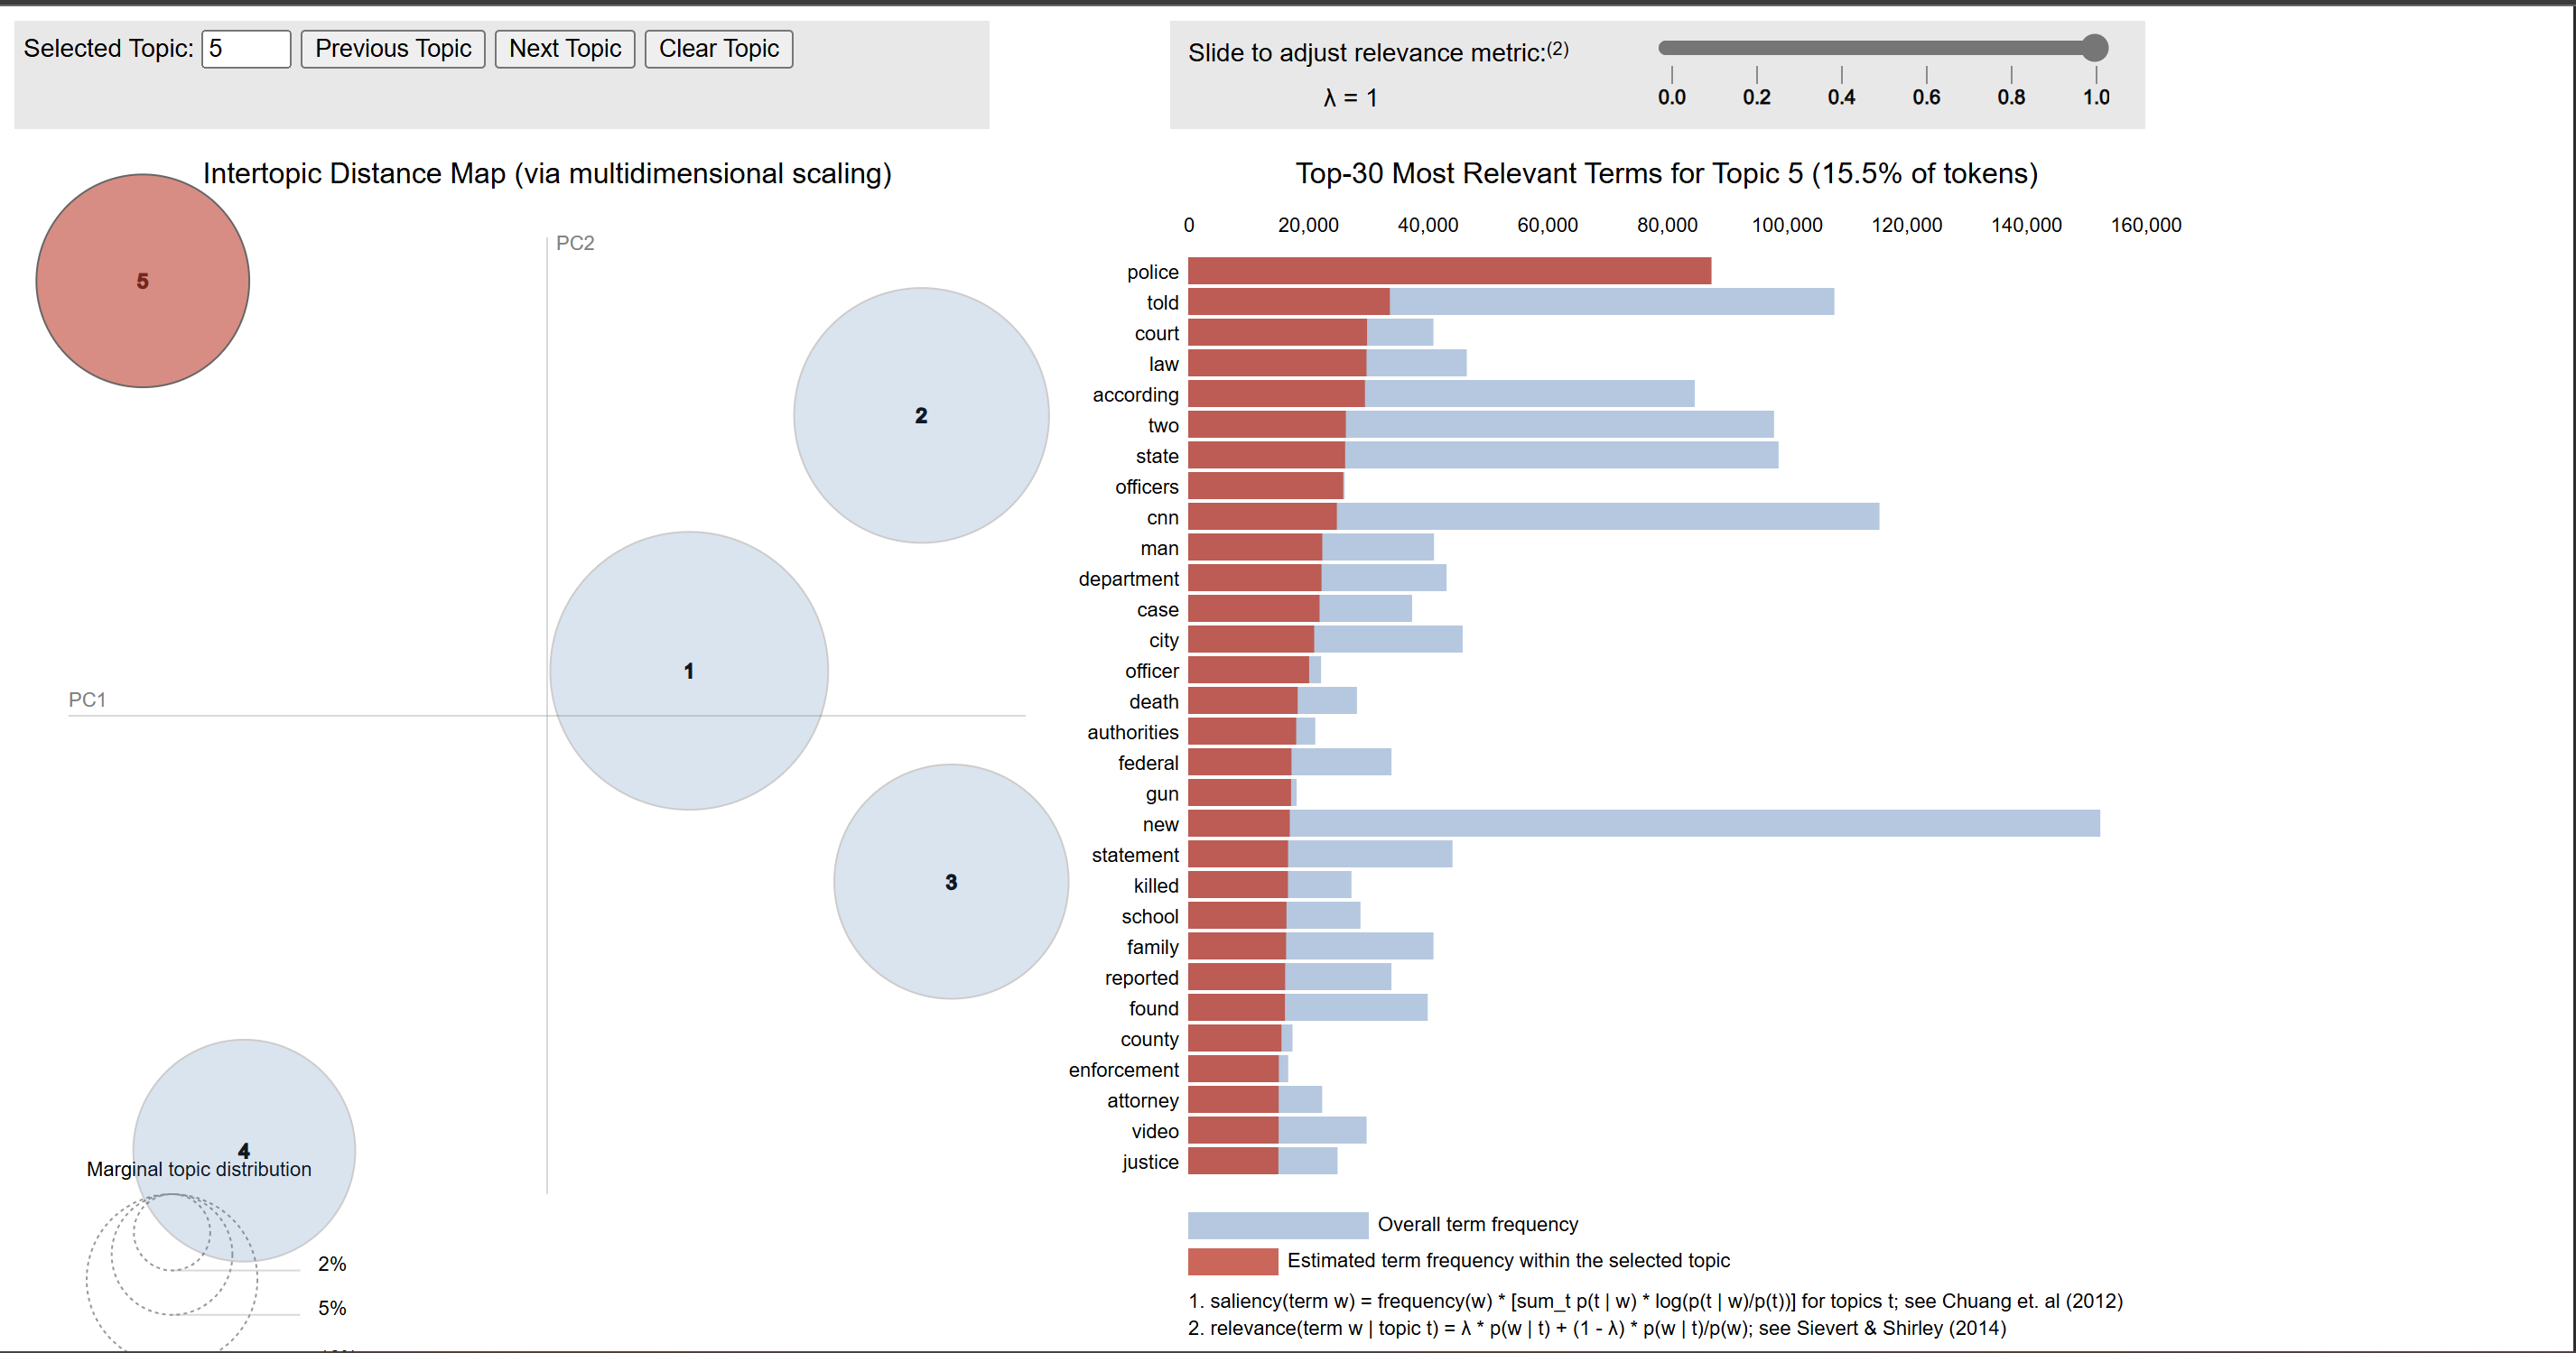

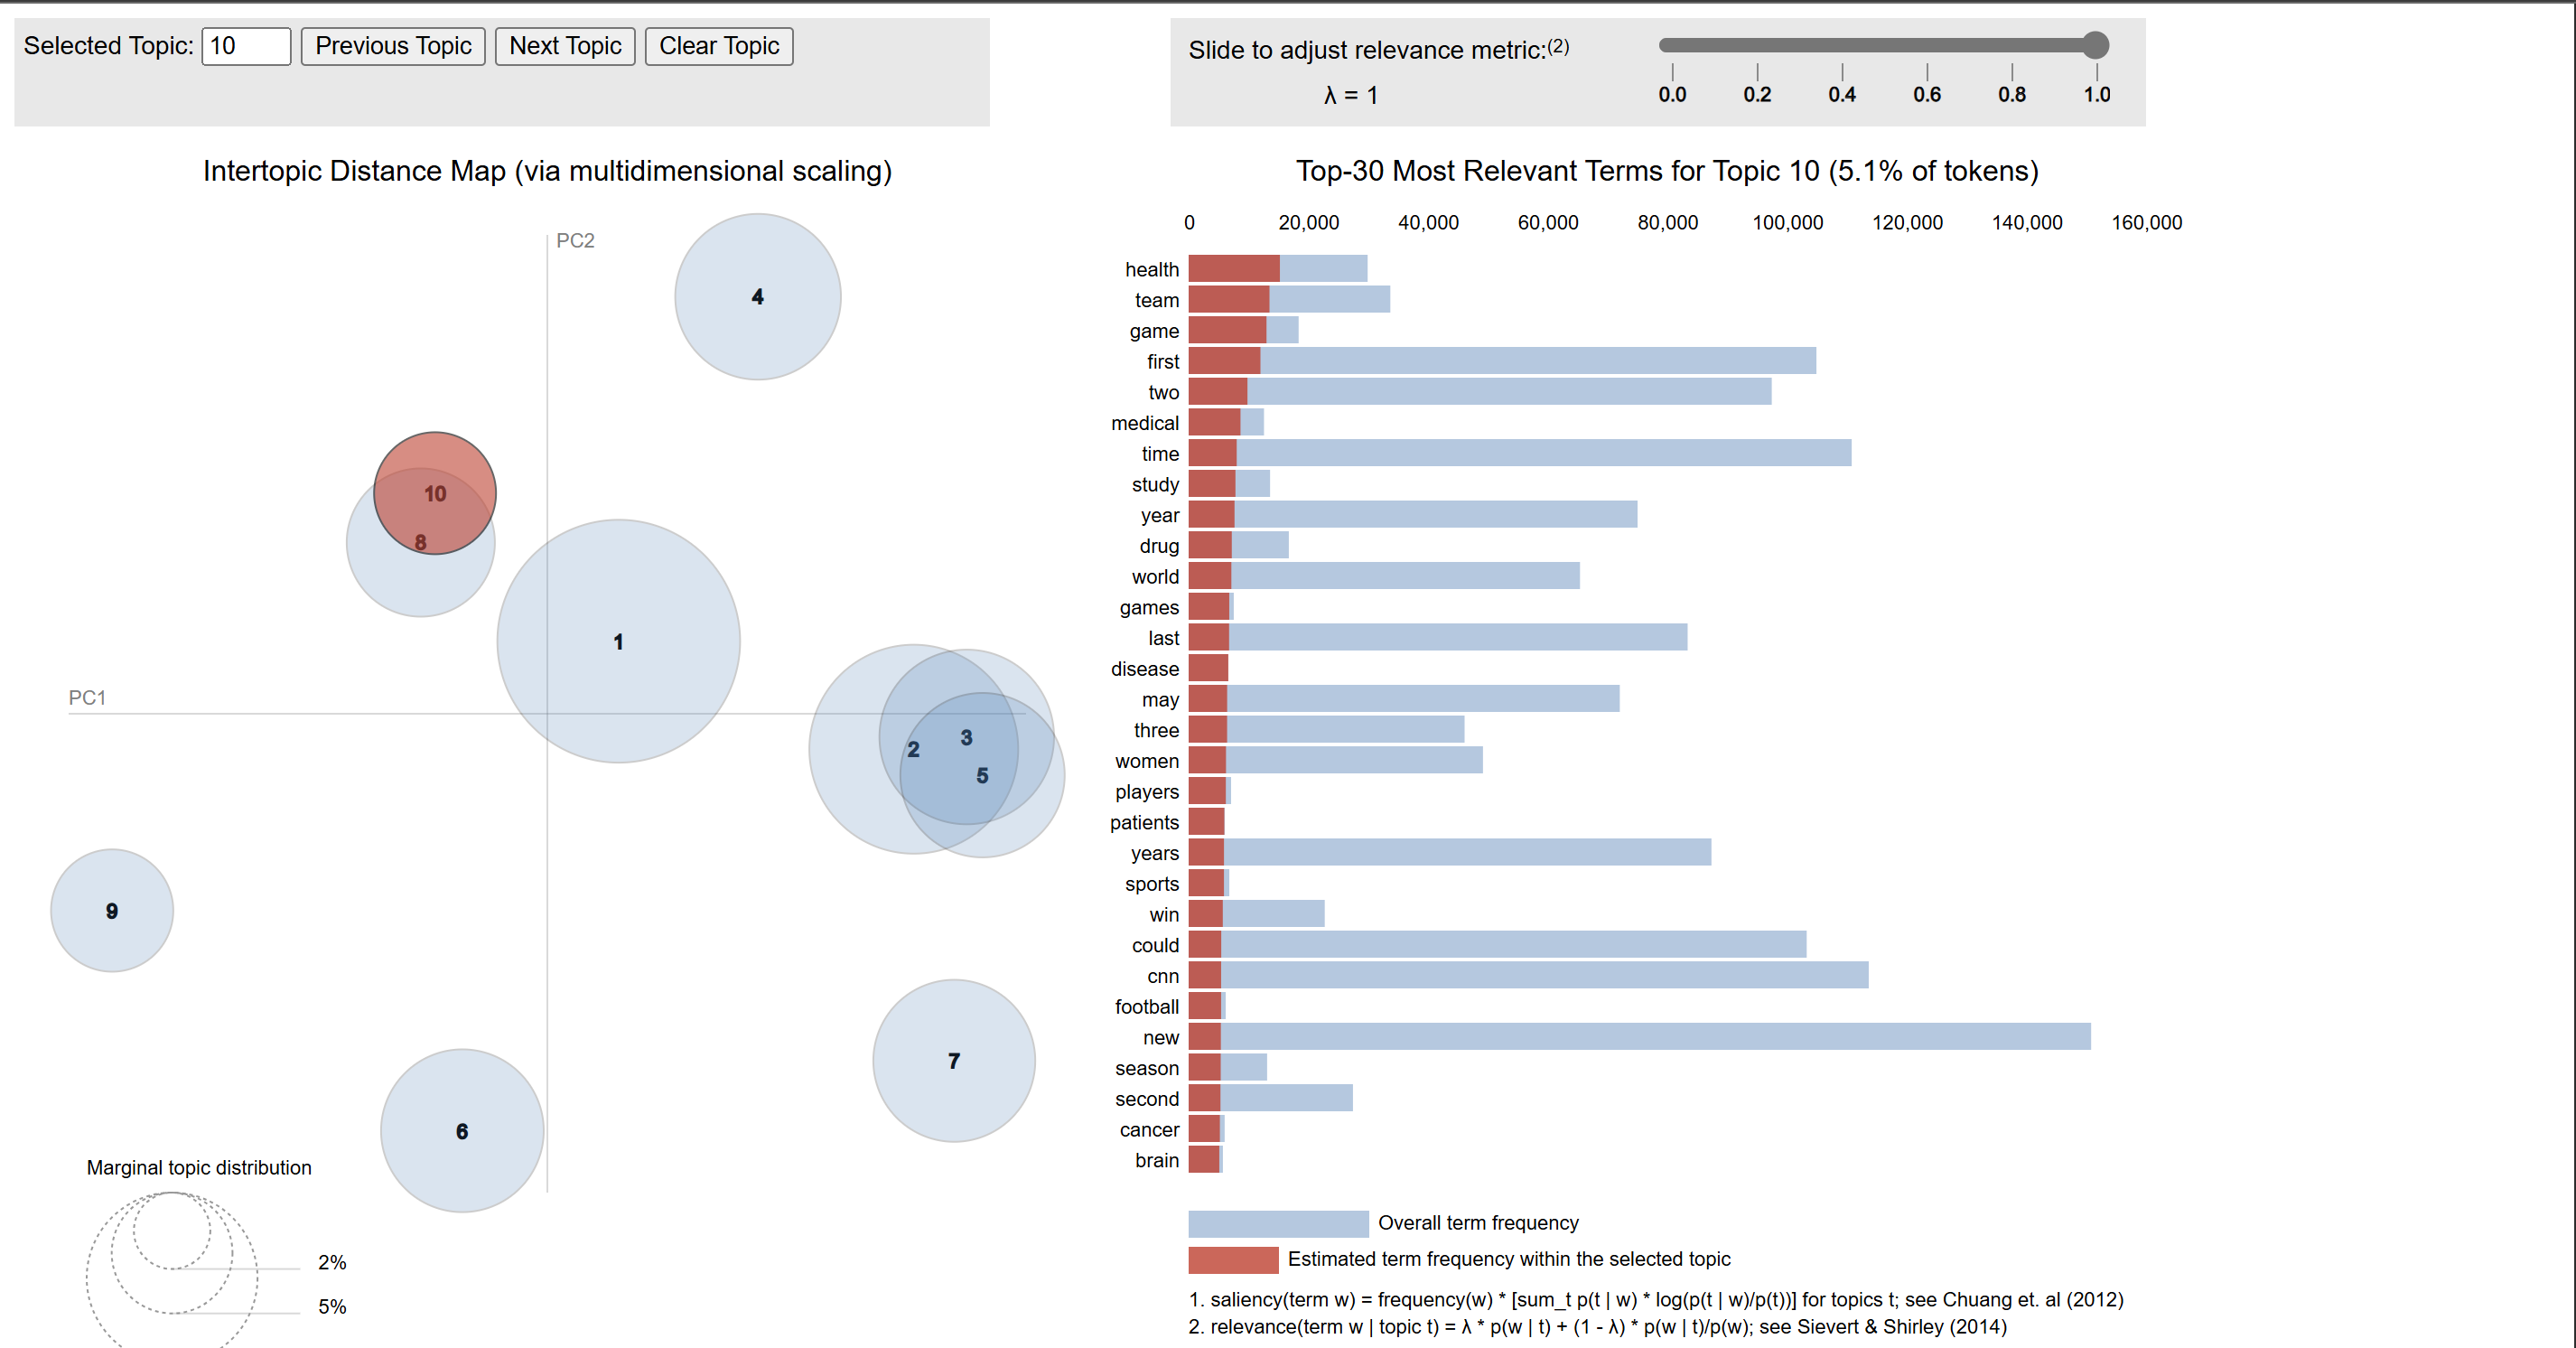

# **Save the visualization as HTML for submission**



In [ ]:
pyLDAvis.save_html(vis, '/content/drive/MyDrive/NLP/assigment6/lda_visualization8.html')
from google.colab import files
files.download('/content/drive/MyDrive/NLP/assigment6/lda_visualization8.html')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

: